In [77]:
#Instalo e importo paquetes 

!pip install pandas
import pandas as pd 

import numpy as np 
import os

from IPython.display import Image, display

import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2025
t0125 = pd.read_excel('/Users/lautaro/Downloads/usu_individual_t125.xlsx/usu_individual_T125.xlsx')

In [79]:
#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2005
t0105 = pd.read_stata('/Users/lautaro/Downloads/usu_individual_t105.dta/Individual_t105.dta')

#Seteo el tamaño de las Columnas y Filas que me muestra Jupiter
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 20)

#VOY ANALIZANDO LOS TIPOS DE DATOS DE AMBOS DATAFRAMES. PARA ESTABLECER LAS COLUMNAS QUE REQUIEREN RECONVERSION
print(t0105.dtypes)
print(t0125.dtypes)

CODUSU          object
nro_hogar      float64
componente    category
h15           category
ano4           float64
                ...   
adeccfr         object
pj1_1         category
pj2_1         category
pj3_1         category
idimpp          object
Length: 176, dtype: object
CODUSU         object
ANO4            int64
TRIMESTRE       int64
NRO_HOGAR       int64
COMPONENTE      int64
               ...   
P_RDECCF      float64
P_GDECCF      float64
P_PDECCF      float64
P_IDECCF      float64
P_ADECCF      float64
Length: 235, dtype: object


In [80]:
#PRIMERO VOY ESTABLECER LAS FILAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS
#QUE SON LA DE LOS AGLOMERADOS DE LA REGION NOA

categorias = ['Santiago del Estero - La Banda', 'Salta', 'La Rioja', 'Gran Catamarca', 'Jujuy - Palpalá','Gran Tucumán - Tafí Viejo']
Sel_t0105_1 = t0105[t0105['aglomerado'].isin(categorias)].copy()


categorias2 = [18,19,22,23,25,29]
Sel_t0125_1 = t0125[t0125['AGLOMERADO'].isin(categorias2)].copy()

#AHORA VOY ESTABLECER LAS COLUMNAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS

Sel_t0105 = Sel_t0105_1[[
'CODUSU', 'nro_hogar', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch14', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp04b_cod', 'ipcf'
]].copy()

Sel_t0125 = Sel_t0125_1[[
'CODUSU', 'NRO_HOGAR', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04B_COD', 'IPCF'
]].copy()

In [81]:
#RECODIFICO LAS COLUMNAS NECESARIAS PARA QUE SE PUEDAN UNIFICAR, FINALMENTE AMBOS DATAFRAMES

# Diccionario del mapeo de los aglomerados pertenecientes al NOA
aglomerado_map = {
    'Santiago del Estero - La Banda': 18,    'Jujuy - Palpalá': 19,
    'Gran Catamarca': 22,    'Salta': 23,
    'La Rioja': 25,          'Gran Tucumán - Tafí Viejo': 29
                }
#Creo esta lista para ir depositando los errores que vaya encontrado la transformacion y después ver qué corregir 
errores = []

#Lo lleva a un tipo de dato que me facilita la transformacion
Sel_t0105['aglomerado'] = Sel_t0105['aglomerado'].astype(str)

#Armo un bucle para que recorra todas las celdas de la columna y vaya tranformando los datos segun el diccionario.
#Para ello utilizo la función .at[] con la que modifico una sola celda en un DataFrame, usando la combinación de índice y nombre de columna.


for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'aglomerado']
    if desc in aglomerado_map:
        Sel_t0105.at[i, 'aglomerado'] = aglomerado_map[desc]
    else:
        errores.append((i, desc))

#una vez recodificado, transformo el tipo de dato para poder ir homogeneizando ambos DF y poder unirlos finalmente

Sel_t0105['aglomerado'] = Sel_t0105['aglomerado'].astype('int64')

In [82]:
#Defino el diccionario de valores que debe buscar y reemplazar
ch03_map = {
    'Jefe/a': 1,     'Jefe': 1,
    'Cónyuge/pareja': 2,    'Cónyuge/Pareja': 2,
    'Hijo/a/hijastro/a': 3,  'Hijo/Hijastro': 3,
    'Yerno/nuera': 4,        'Yerno/Nuera': 4,
    'Nieto/a': 5,            'Nieto': 5,
    'Madre/padre': 6,         'Madre/Padre': 6,
    'Suegro/a': 7,             'Suegro': 7,
    'Hermano/a': 8,              'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}

errores = []

#Para el 2005
Sel_t0105['ch03'] = Sel_t0105['ch03'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch03']
    if desc in ch03_map:
        Sel_t0105.at[i, 'ch03'] = ch03_map[desc]
    else:
        errores.append((i, desc))


#una vez recodificado transformo el tipo de dato a numerico
Sel_t0105['ch03'] = pd.to_numeric(Sel_t0105['ch03'], errors='coerce')

In [83]:
# tomare a la variable sexo de SEXO con una Dummies, en los 2 años, recodificandola en 0 y 1.

Sel_t0105['ch04'] = np.where(Sel_t0105['ch04'] == 'Varón', 1, 0)

Sel_t0125['CH04'] = np.where(Sel_t0125['CH04'] == 1,1,0)

#una vez recodificado transformo el tipo de dato
Sel_t0105['ch04'] = Sel_t0105['ch04'].astype('int64')

In [84]:
# Para el punto 2.C
#Excluimos los valores de EDAD-ch06 fuera de rango, que son aquellos de menos de un año y los mayores de 98 .. Pueden ser errores de carga

###########################################
#Para el 2005
Sel_t0105['ch06'] = Sel_t0105['ch06'].astype(str)

Sel_t0105 = Sel_t0105.loc[
    (Sel_t0105['ch06'] != 'Menos de 1 año') & 
    (Sel_t0105['ch06'] != '98 y más años')
]

Sel_t0105['ch06'] = pd.to_numeric(Sel_t0105['ch06'], errors='coerce')

###########################################

#Para el 2025
Sel_t0125['CH06'] = Sel_t0125['CH06'].astype(str)

Sel_t0125 = Sel_t0125.loc[
    (Sel_t0125['CH06'] != 'Menos de 1 año') & 
    (Sel_t0125['CH06'] != '98 y más años') &
    (Sel_t0125['CH06'] != '103') &
    (Sel_t0125['CH06'] != '-1') 
]

#una vez recodificado transformo el tipo de dato
Sel_t0125['CH06'] = pd.to_numeric(Sel_t0125['CH06'], errors='coerce')

In [85]:
#Para estado civil

ch07_map = {'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5  }


Sel_t0105['ch07'] = Sel_t0105['ch07'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch07']
    if desc in ch07_map:
        Sel_t0105.at[i, 'ch07'] = ch07_map[desc]
    else:
        errores.append((i, desc))

#una vez recodificado transformo el tipo de dato
Sel_t0105['ch07'] = Sel_t0105['ch07'].astype('int64')

In [86]:
#Para cobertura medica

#Diccionario para transformar
ch08_map = {
'Obra social (incluye PAMI)':1, 'Mutual/Prepaga/Servicio de emergencia':2, 'Planes y seguros públicos':3, 'No paga ni le descuentan':4, 'Ns./Nr.':9, 
'Obra social y mutual/prepaga/servicio de emergencia':12, 'Obra social y planes y seguros públicos':13, 
'Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos':23, 
'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos':123
}

Sel_t0105['ch08'] = Sel_t0105['ch08'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'ch08']
    if desc in ch08_map:
        Sel_t0105.at[i, 'ch08'] = ch08_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['ch08'] = pd.to_numeric(Sel_t0105['ch08'], errors='coerce')

In [87]:
#Para el último año que aprobo

#Primero lo llevo a string para despues llevarlo a numerico al campo del ultimo curso aprobado

Sel_t0105['ch14'] = Sel_t0105['ch14'].str.strip()

Sel_t0105['ch14'] = pd.to_numeric(Sel_t0105['ch14'], errors='coerce')

In [88]:
#Para el Nivel educativo

nivel_ed_map = {'Primaria Completa':2, 'Primaria Incompleta (incluye educación especial)':1, 'Secundaria Completa':4, 
            'Secundaria Incompleta':3, 'Sin instrucción':7, 'Superior Universitaria Completa':6, 
            'Superior Universitaria Incompleta':5, 'Ns/Nr':9
           }

Sel_t0105['nivel_ed'] = Sel_t0105['nivel_ed'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'nivel_ed']
    if desc in nivel_ed_map:
        Sel_t0105.at[i, 'nivel_ed'] = nivel_ed_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['nivel_ed'] = pd.to_numeric(Sel_t0105['nivel_ed'], errors='coerce')

In [89]:
#Para la condicion de actividad

estado_map = {'Entrevista individual no realizada (no respuesta al cuestion':0, 
                'Ocupado':1, 'Desocupado':2, 'Inactivo':3, 'Menor de 10 años':4
               }

Sel_t0105['estado'] = Sel_t0105['estado'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'estado']
    if desc in estado_map:
        Sel_t0105.at[i, 'estado'] = estado_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['estado'] = pd.to_numeric(Sel_t0105['estado'], errors='coerce')

In [90]:
#Para la categoria ocupacional

cat_ocup_map = {'Patrón':1, 'Cuenta propia':2, 'Obrero o empleado':3,
              'Trabajador familiar sin remuneración':4,'Nr/Nr':9
             }

errores = []

Sel_t0105['cat_ocup'] = Sel_t0105['cat_ocup'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'cat_ocup']
    if desc in cat_ocup_map:
        Sel_t0105.at[i, 'cat_ocup'] = cat_ocup_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['cat_ocup'] = pd.to_numeric(Sel_t0105['cat_ocup'], errors='coerce')

#Como el valor "0" no esta tipificado dentro de los cuadros de referencia, lo reemplazare por un valor nulo. Para los puntos 2.b y 2.c
Sel_t0105['cat_ocup'] = Sel_t0105['cat_ocup'].replace(0, np.nan)
Sel_t0125['CAT_OCUP'] = Sel_t0125['CAT_OCUP'].replace(0, np.nan)

In [91]:
#Para la categoria de inactividad

cat_inac_map = {'Ama de casa':4, 'Discapacitado':6, 'Estudiante':3, 'Jubilado/pensionado':1, 
                'Menor de 6 años':5, 'Otros':7, 'Rentista':2
                 }

Sel_t0105['cat_inac'] = Sel_t0105['cat_inac'].astype(str)

for i in Sel_t0105.index:
    desc = Sel_t0105.at[i, 'cat_inac']
    if desc in cat_inac_map:
        Sel_t0105.at[i, 'cat_inac'] = cat_inac_map[desc]
    else:
        errores.append((i, desc))


Sel_t0105['cat_inac'] = pd.to_numeric(Sel_t0105['cat_inac'], errors='coerce')

Sel_t0125['CAT_INAC'] = pd.to_numeric(Sel_t0125['CAT_INAC'], errors='coerce')

In [92]:
# Se termina de limpiar datos de ambas bases. Para puntos 2.b y 2.c

#Como el valor "0" no esta tipificado dentro de los cuadros de referencia, lo reemplazare por un valor nulo

Sel_t0105['cat_inac'] = Sel_t0105['cat_inac'].replace(0, np.nan)
Sel_t0125['CAT_INAC'] = Sel_t0125['CAT_INAC'].replace(0, np.nan)

#Como en 2025, la columna de esta columna no figura como nulo pero en la de 2025 si, voy transformar el dato de 2005


Sel_t0105['pp04b_cod'] = pd.to_numeric(Sel_t0105['pp04b_cod'], errors='coerce')
Sel_t0105['pp04b_cod'] = Sel_t0105['pp04b_cod'].replace(0, np.nan)

#Porque sino despues no voy a poder concatenar los 2 Dataframes 
Sel_t0125['PP04B_COD'] = pd.to_numeric(Sel_t0125['PP04B_COD'], errors='coerce')

In [93]:
#Tengo que renombrar las columnas para que ambos dataframes tengan igual nombre porque sino 
#no voy a poder poder concatenar correctamente (en la misma columna, una abajo de la otra)los 2 DataFrames

Sel_t0105 = Sel_t0105.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'aglomerado': 'AGLOMERADO',
'pondera': 'PONDERA',
'ch03': 'CH03',
'ch04': 'CH04',
'ch06': 'CH06',
'ch07': 'CH07',
'ch08': 'CH08',
'ch14': 'CH14',
'nivel_ed': 'NIVEL_ED',
'estado': 'ESTADO',
'cat_ocup': 'CAT_OCUP',
'cat_inac': 'CAT_INAC',
'pp04b_cod': 'PP04B_COD',
'ipcf': 'IPCF'
})

print(Sel_t0105.dtypes)

CODUSU         object
NRO_HOGAR     float64
AGLOMERADO      int64
PONDERA       float64
CH03            int64
CH04            int64
CH06          float64
CH07            int64
CH08            int64
CH14          float64
NIVEL_ED        int64
ESTADO          int64
CAT_OCUP      float64
CAT_INAC      float64
PP04B_COD     float64
IPCF          float64
dtype: object


In [94]:
#Ahora uno a las 2 bases de datos individuales del 2.a

Sel_t0105 = Sel_t0105.copy(); Sel_t0105["año"] = 2005 
Sel_t0125 = Sel_t0125.copy(); Sel_t0125["año"] = 2025 

Sel_indiv = pd.concat([Sel_t0105, Sel_t0125], ignore_index=True)

Sel_indiv

,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP04B_COD,IPCF,año
0,125666,1.0,18,301.0,1,1,36.0,1,4.0,2.0,3,1,3.0,NaN,9201.0,140.0,2005
1,125666,1.0,18,301.0,2,0,35.0,1,4.0,NaN,2,3,NaN,4.0,NaN,140.0,2005
2,125666,1.0,18,301.0,3,0,15.0,5,4.0,1.0,3,3,NaN,3.0,NaN,140.0,2005
3,125666,1.0,18,301.0,3,1,12.0,5,4.0,8.0,3,3,NaN,3.0,NaN,140.0,2005
4,125666,1.0,18,301.0,3,1,10.0,5,4.0,5.0,1,3,NaN,3.0,NaN,140.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18867,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,22,184.0,1,0,90.0,4,1.0,NaN,4,3,NaN,1.0,NaN,1250000.0,2025
18868,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,22,184.0,3,0,60.0,5,1.0,NaN,6,1,3.0,NaN,8501.0,1250000.0,2025
18869,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,22,184.0,5,0,22.0,5,1.0,3.0,5,3,NaN,3.0,NaN,1250000.0,2025
18870,TQRMNOPPVHKOKSCDEHIBB00860370,1.0,22,108.0,1,1,25.0,1,4.0,NaN,2,1,3.0,NaN,5601.0,537500.0,2025


In [95]:
df = Sel_indiv.copy()

# 1) Forzar numérico
df["CH04"] = pd.to_numeric(df["CH04"], errors="coerce")   # 1=varón, 0=mujer
df["CH06"] = pd.to_numeric(df["CH06"], errors="coerce")   # edad (puede venir 29.0)


# 3) Redondear edad a años enteros (por si tuviera decimales)
df["CH06"] = df["CH06"].round()

# 4) Eliminar filas con faltantes en CH04 o CH06
before = len(df)
df = df.dropna(subset=["CH04", "CH06"]).copy()
removed = before - len(df)
print(f"Filas eliminadas por faltantes/valores inválidos en CH04/CH06: {removed}")

# 5) Convertir a enteros “duros” para merges
df["CH04"] = df["CH04"].astype("int64")
df["CH06"] = df["CH06"].astype("int64")

# 6) Actualizar base
Sel_indiv = df

# 7) Chequeos rápidos
print(Sel_indiv[["CH04","CH06"]].dtypes)
print("Rango de edad final:", Sel_indiv["CH06"].min(), "→", Sel_indiv["CH06"].max())
print("Distribución CH04:", Sel_indiv["CH04"].value_counts().sort_index().to_dict())


Filas eliminadas por faltantes/valores inválidos en CH04/CH06: 0
CH04    int64
CH06    int64
dtype: object
Rango de edad final: 1 → 96
Distribución CH04: {0: 9793, 1: 9079}


In [96]:
df

,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP04B_COD,IPCF,año
0,125666,1.0,18,301.0,1,1,36,1,4.0,2.0,3,1,3.0,NaN,9201.0,140.0,2005
1,125666,1.0,18,301.0,2,0,35,1,4.0,NaN,2,3,NaN,4.0,NaN,140.0,2005
2,125666,1.0,18,301.0,3,0,15,5,4.0,1.0,3,3,NaN,3.0,NaN,140.0,2005
3,125666,1.0,18,301.0,3,1,12,5,4.0,8.0,3,3,NaN,3.0,NaN,140.0,2005
4,125666,1.0,18,301.0,3,1,10,5,4.0,5.0,1,3,NaN,3.0,NaN,140.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18867,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,22,184.0,1,0,90,4,1.0,NaN,4,3,NaN,1.0,NaN,1250000.0,2025
18868,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,22,184.0,3,0,60,5,1.0,NaN,6,1,3.0,NaN,8501.0,1250000.0,2025
18869,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,22,184.0,5,0,22,5,1.0,3.0,5,3,NaN,3.0,NaN,1250000.0,2025
18870,TQRMNOPPVHKOKSCDEHIBB00860370,1.0,22,108.0,1,1,25,1,4.0,NaN,2,1,3.0,NaN,5601.0,537500.0,2025


In [97]:
tab = pd.read_excel("/Users/lautaro/Desktop/BigData/TP2/tabla_adulto_equiv.xlsx")
print (tab.columns)
tab

Index(['Edad', 'Mujeres', 'Varones'], dtype='object')


,Edad,Mujeres,Varones
0,Menor de 1 año,0.35,0.35
1,1año,0.37,0.37
2,2 años,0.46,0.46
3,3 años,0.51,0.51
4,4 años,0.55,0.55
...,...,...,...
18,18 a 29 años,0.76,1.02
19,30 a 45 años,0.77,1.00
20,46 a 60 años,0.76,1.00
21,61 a 75 años,0.67,0.83


In [98]:
import re, unicodedata

tab = pd.read_excel("/Users/lautaro/Desktop/BigData/TP2/tabla_adulto_equiv.xlsx")  # columnas visibles: Edad, Mujeres, Varones

# normalizador suave (quita acentos/nbspace, baja a minúsculas)
def _norm(s):
    s = unicodedata.normalize("NFKD", str(s))
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = s.replace("\u00a0"," ").strip().lower()
    s = re.sub(r"\s+", " ", s)
    return s

# parser de la columna "Edad" según el Excel (cubre: "1año", "2 años", "18 a 29 años", "más de 75 años", "menor de 1 año")
def _parse_edad_cell(x, max_age=96):
    s = _norm(x).replace("más","mas").replace("años","anos").replace("año","ano")
    if s in {"menos de 1", "menor de 1", "menores de 1", "<1", "menos de 1 ano"}:
        return (None, None)                 # arrancamos en 1, así que lo ignoramos
    # "lo a hi" o "lo-hi"
    m = re.match(r"^(\d+)\s*(?:a|-|–|—)\s*(\d+)", s)
    if m: return int(m.group(1)), int(m.group(2))
    # "lo+"  | "lo y mas"
    m = re.match(r"^(\d+)\s*\+$", s) or re.match(r"^(\d+)\s*y\s*mas$", s)
    if m: return int(m.group(1)), max_age
    # "mas de lo"
    m = re.match(r"^mas\s+de\s+(\d+)", s)
    if m: return int(m.group(1)) + 1, max_age
    # un solo número con o sin "ano(s)" pegado o con espacio: "1año", "2 anos", "3"
    m = re.match(r"^(\d+)\s*(?:ano|anos)?$", s)
    if m: 
        v = int(m.group(1)); 
        return v, v
    return (None, None)

MIN_AGE, MAX_AGE = 1, 96

rows = []
for _, r in tab[["Edad","Mujeres","Varones"]].iterrows():
    lo, hi = _parse_edad_cell(r["Edad"], max_age=MAX_AGE)
    if lo is None or hi is None:
        continue
    lo = max(MIN_AGE, lo)
    hi = min(MAX_AGE, hi)
    if hi < lo:
        continue
    for age in range(lo, hi+1):
        rows.append((age, r["Mujeres"], r["Varones"]))

tab_exp = (pd.DataFrame(rows, columns=["edad","mujeres","varones"])
             .drop_duplicates("edad")
             .sort_values("edad")
             .reset_index(drop=True))

# chequeo de cobertura
faltan = [e for e in range(MIN_AGE, MAX_AGE+1) if e not in set(tab_exp["edad"].tolist())]
print(f"Edades cubiertas: {tab_exp['edad'].min()} → {tab_exp['edad'].max()}")
print("¿Faltan edades (1..96)?", len(faltan), "| ejemplos:", faltan[:15])



Edades cubiertas: 1 → 96
¿Faltan edades (1..96)? 0 | ejemplos: []


In [99]:
tab_exp.head

<bound method NDFrame.head of     edad  mujeres  varones
0      1     0.37     0.37
1      2     0.46     0.46
2      3     0.51     0.51
3      4     0.55     0.55
4      5     0.60     0.60
..   ...      ...      ...
91    92     0.63     0.74
92    93     0.63     0.74
93    94     0.63     0.74
94    95     0.63     0.74
95    96     0.63     0.74

[96 rows x 3 columns]>

In [100]:
# Creo adulto_equiv en la base (CH04=1 varón, 0 mujer; CH06=edad)
Sel_indiv = Sel_indiv.copy()
Sel_indiv["CH04"] = pd.to_numeric(Sel_indiv["CH04"], errors="coerce").astype("Int64")   # 1 varón, 0 mujer
Sel_indiv["CH06"] = pd.to_numeric(Sel_indiv["CH06"], errors="coerce").round().astype("Int64")

# diccionarios edad -> valor
map_varon = dict(zip(tab_exp["edad"], tab_exp["varones"]))
map_mujer = dict(zip(tab_exp["edad"], tab_exp["mujeres"]))

# construir la columna (tolerante a NaN)
Sel_indiv["adulto_equiv"] = pd.Series(pd.NA, index=Sel_indiv.index, dtype="Float64")
m_v = Sel_indiv["CH04"].eq(1) & Sel_indiv["CH06"].notna()
m_m = Sel_indiv["CH04"].eq(0) & Sel_indiv["CH06"].notna()
Sel_indiv.loc[m_v, "adulto_equiv"] = Sel_indiv.loc[m_v, "CH06"].map(map_varon).to_numpy()
Sel_indiv.loc[m_m, "adulto_equiv"] = Sel_indiv.loc[m_m, "CH06"].map(map_mujer).to_numpy()

# chequeo breve
print("Sin match (faltantes o edades fuera de 1–96):", int(Sel_indiv["adulto_equiv"].isna().sum()))

Sin match (faltantes o edades fuera de 1–96): 0


In [101]:

# asegurar tipos de las llaves del hogar
Sel_indiv = Sel_indiv.copy()
Sel_indiv["NRO_HOGAR"] = pd.to_numeric(Sel_indiv["NRO_HOGAR"], errors="coerce").astype("Int64")
Sel_indiv["CODUSU"]    = Sel_indiv["CODUSU"].astype(str)

keys = ["CODUSU", "NRO_HOGAR"]

# suma por hogar (con min_count=1 por si alguna vez hubiera todos NaN)
agg = (Sel_indiv
       .groupby(keys, dropna=False)["adulto_equiv"]
       .sum(min_count=1)
       .rename("ad_equiv_hogar")
       .reset_index())

Sel_indiv = Sel_indiv.merge(agg, on=keys, how="left")

# chequeo rápido
Sel_indiv[keys + ["adulto_equiv", "ad_equiv_hogar"]].head()


,CODUSU,NRO_HOGAR,adulto_equiv,ad_equiv_hogar
0,125666,1,1.0,4.18
1,125666,1,0.77,4.18
2,125666,1,0.77,4.18
3,125666,1,0.85,4.18
4,125666,1,0.79,4.18


In [102]:
# Personas con su adulto_equiv (ordenado por hogar)
cols = ["CODUSU", "NRO_HOGAR", "CH06", "CH04", "adulto_equiv"]
vista_personas = (Sel_indiv[cols]
                  .sort_values(["CODUSU","NRO_HOGAR"])
                  .reset_index(drop=True))
vista_personas.head(20)   


,CODUSU,NRO_HOGAR,CH06,CH04,adulto_equiv
0,125029,1,58,1,1.0
1,125029,1,55,0,0.76
2,125029,1,24,0,0.76
3,125029,1,26,1,1.02
4,125029,1,79,0,0.63
5,125078,1,83,0,0.63
6,125078,1,50,0,0.76
7,125078,1,24,0,0.76
8,125078,1,22,0,0.76
9,125078,1,15,0,0.77


In [103]:
hogares = (Sel_indiv
           .groupby(["CODUSU","NRO_HOGAR"], dropna=False, as_index=False)
           .agg(ad_equiv_hogar=("adulto_equiv","sum")))

hogares.head(20)


,CODUSU,NRO_HOGAR,ad_equiv_hogar
0,125029,1,4.17
1,125078,1,3.68
2,125297,1,3.08
3,125335,1,1.79
4,125415,1,3.29
5,125463,1,3.44
6,125666,1,4.18
7,125725,1,1.5
8,125850,1,2.97
9,125940,1,3.29


In [104]:
print (Sel_indiv) #para chequear nomás

                              CODUSU  NRO_HOGAR  AGLOMERADO  PONDERA  CH03  \
0                           125666            1          18    301.0     1   
1                           125666            1          18    301.0     2   
2                           125666            1          18    301.0     3   
3                           125666            1          18    301.0     3   
4                           125666            1          18    301.0     3   
...                              ...        ...         ...      ...   ...   
18867  TQRMNOQYSHMKKRCDEHIBB00882443          1          22    184.0     1   
18868  TQRMNOQYSHMKKRCDEHIBB00882443          1          22    184.0     3   
18869  TQRMNOQYSHMKKRCDEHIBB00882443          1          22    184.0     5   
18870  TQRMNOPPVHKOKSCDEHIBB00860370          1          22    108.0     1   
18871  TQRMNOPPVHKOKSCDEHIBB00860370          1          22    108.0     2   

       CH04  CH06  CH07  CH08  CH14  NIVEL_ED  ESTADO  CAT_OCUP

In [105]:
# Mapa de Canasta Básica Total por adulto equivalente
CBT_AE = {2005: 205.07, 2025: 365_177.0}

df = Sel_indiv.copy()

# Aseguro que 'año' sea numérico (por si vino como string)
df["año"] = pd.to_numeric(df["año"], errors="coerce").astype("Int64")

# Traigo la CBT del año y calculo ingreso_necesario
df["CBT_AE"] = df["año"].map(CBT_AE).astype("Float64")
df["ingreso_necesario"] = (df["ad_equiv_hogar"] * df["CBT_AE"]).round(2).astype("Float64")

# Actualizo 
Sel_indiv = df

# Chequeo rápido por año
print(
    Sel_indiv.groupby("año")["ingreso_necesario"]
    .agg(["count","min","median","max"])
    .round(2)
)
Sel_indiv[["CODUSU","NRO_HOGAR","año","ad_equiv_hogar","ingreso_necesario"]].head(10)


      count        min      median         max
año                                           
2005   9182     129.19      781.32     2540.82
2025   9690  230061.51  1197780.56  3973125.76


,CODUSU,NRO_HOGAR,año,ad_equiv_hogar,ingreso_necesario
0,125666,1,2005,4.18,857.19
1,125666,1,2005,4.18,857.19
2,125666,1,2005,4.18,857.19
3,125666,1,2005,4.18,857.19
4,125666,1,2005,4.18,857.19
5,126344,1,2005,2.79,572.15
6,126344,1,2005,2.79,572.15
7,126344,1,2005,2.79,572.15
8,127081,1,2005,1.39,285.05
9,127081,1,2005,1.39,285.05


In [106]:
df = Sel_indiv.copy()

# --- Tipos y llaves hogar ---
df["CODUSU"]    = df["CODUSU"].astype(str)
df["NRO_HOGAR"] = pd.to_numeric(df["NRO_HOGAR"], errors="coerce").astype("Int64")
df["año"]       = pd.to_numeric(df["año"], errors="coerce").astype("Int64")
keys = ["año","CODUSU","NRO_HOGAR"]

# --- Miembros del hogar ---
df["miembros_hogar"] = df.groupby(keys)["CODUSU"].transform("size")

# --- Ingreso del hogar: ITF si existe; si no, IPCF * miembros ---
if "ITF" in df.columns:
    df["ITF"] = pd.to_numeric(df["ITF"], errors="coerce")
    df["ingreso_hogar"] = df.groupby(keys)["ITF"].transform(lambda s: s.dropna().iloc[0] if not s.dropna().empty else np.nan)
else:
    if "IPCF" not in df.columns:
        raise ValueError("No hay ITF ni IPCF para estimar ingreso del hogar.")
    df["IPCF"] = pd.to_numeric(df["IPCF"], errors="coerce")
    df["ingreso_hogar"] = (df["IPCF"] * df["miembros_hogar"]).astype("Float64")


# --- Flag de pobreza (1 si ITF/ingreso_hogar < ingreso_necesario; 0 en caso contrario) ---
mask = df["ingreso_hogar"].notna() & df["ingreso_necesario"].notna()
df["pobre"] = pd.Series(pd.NA, index=df.index, dtype="Int64")
df.loc[mask, "pobre"] = (df.loc[mask, "ingreso_hogar"] < df.loc[mask, "ingreso_necesario"]).astype("Int64")




In [108]:
# --- Resumen por AÑO a nivel HOGAR ---
hogares = (df.groupby(keys, as_index=False)
             .agg(pobre=("pobre","first")))  # el valor es único por hogar

res = (hogares.groupby("año")
       .apply(lambda g: pd.Series({
           "hogares_total": len(g),
           "hogares_pobres": int((g["pobre"]==1).sum()),
           "pct_pobres_sobre_muestra": round(100*((g["pobre"]==1).mean()), 2),
       }))
       .reset_index())

print("=== Resultado (hogares) por año ===")
print(res)

# Actualizo tu objeto de trabajo
Sel_indiv = df


=== Resultado (hogares) por año ===
    año  hogares_total  hogares_pobres  pct_pobres_sobre_muestra
0  2005         2333.0           853.0                     36.56
1  2025         3051.0          1299.0                     42.58


In [111]:
# vista rápida de columnas clave
Sel_indiv[["año","CODUSU","NRO_HOGAR","ad_equiv_hogar","ingreso_hogar","ingreso_necesario","pobre"]].head(12)

,año,CODUSU,NRO_HOGAR,ad_equiv_hogar,ingreso_hogar,ingreso_necesario,pobre
0,2005,125666,1,4.18,700.0,857.19,1
1,2005,125666,1,4.18,700.0,857.19,1
2,2005,125666,1,4.18,700.0,857.19,1
3,2005,125666,1,4.18,700.0,857.19,1
4,2005,125666,1,4.18,700.0,857.19,1
5,2005,126344,1,2.79,3800.0,572.15,0
6,2005,126344,1,2.79,3800.0,572.15,0
7,2005,126344,1,2.79,3800.0,572.15,0
8,2005,127081,1,1.39,279.0,285.05,1
9,2005,127081,1,1.39,279.0,285.05,1


In [ ]:
# Identifiqué 853 hogares pobres en 2005 y 1299 hogares pobres en 2025. Eso representa un 36.56% y 42.58% respectivamente

In [116]:
df = Sel_indiv.copy()

# Aseguro tipos mínimos
df["año"]       = pd.to_numeric(df["año"], errors="coerce").astype("Int64")
df["CODUSU"]    = df["CODUSU"].astype(str)
df["NRO_HOGAR"] = pd.to_numeric(df["NRO_HOGAR"], errors="coerce").astype("Int64")
df["pobre"]     = pd.to_numeric(df["pobre"], errors="coerce").astype("Int64")  # 1/0/NA

# Nivel HOGAR
# Una fila por hogar-año, y 'pobre' único por hogar
hogares = (df.groupby(["año","CODUSU","NRO_HOGAR"], as_index=False)
             .agg(pobre=("pobre","first")))

tab_hog = (hogares.groupby("año")
           .agg(hogares_total   = ("pobre","size"),
                hogares_validos = ("pobre", lambda s: s.notna().sum()),
                hogares_pobres  = ("pobre", lambda s: (s == 1).sum()))
           .reset_index())
tab_hog["% hogares pobres (muestra)"] = (100 * tab_hog["hogares_pobres"] / tab_hog["hogares_validos"]).round(2)

# Nivel PERSONA
tab_per = (df.groupby("año")
           .agg(personas_total   = ("pobre","size"),
                personas_validas = ("pobre", lambda s: s.notna().sum()),
                personas_pobres  = ("pobre", lambda s: (s == 1).sum()))
           .reset_index())
tab_per["% personas en hogares pobres (muestra)"] = (100 * tab_per["personas_pobres"] / tab_per["personas_validas"]).round(2)


# Mostramos ambas: por separado y combinada
print("=== Hogares (muestra) ===")
display(tab_hog)
print("\n=== Personas (muestra) ===")
display(tab_per)




=== Hogares (muestra) ===


,año,hogares_total,hogares_validos,hogares_pobres,% hogares pobres (muestra)
0,2005,2333,2333,853,36.56
1,2025,3051,3051,1299,42.58



=== Personas (muestra) ===


,año,personas_total,personas_validas,personas_pobres,% personas en hogares pobres (muestra)
0,2005,9182,9182,4151,45.21
1,2025,9690,9690,4953,51.11


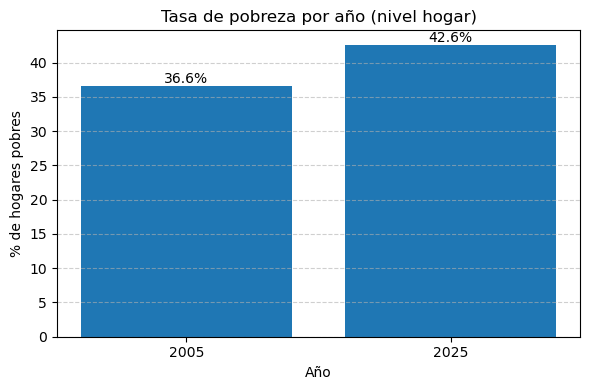

In [117]:
import matplotlib.pyplot as plt

# Copia de trabajo y tipos mínimos 
df = Sel_indiv.copy()
df["año"] = pd.to_numeric(df["año"], errors="coerce")
df["pobre"] = pd.to_numeric(df["pobre"], errors="coerce")  # 1/0/NaN

#  Una fila por hogar-año y valor único de 'pobre'
hog = (df.groupby(["año","CODUSU","NRO_HOGAR"], as_index=False)
         .agg(pobre=("pobre","first")))

#  Tasa de pobreza (% de hogares pobres) por año, sobre hogares con dato válido 
rates = (hog.dropna(subset=["pobre"])
           .groupby("año")["pobre"]
           .mean()
           .mul(100)
           .sort_index())

# --- Gráfico de barras ---
plt.figure(figsize=(6,4))
xticks = rates.index.astype(int).astype(str)
plt.bar(xticks, rates.values)
plt.title("Tasa de pobreza por año (nivel hogar)")
plt.ylabel("% de hogares pobres")
plt.xlabel("Año")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Anotar valores sobre cada barra
for x, y in zip(range(len(xticks)), rates.values):
    plt.text(x, y, f"{y:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


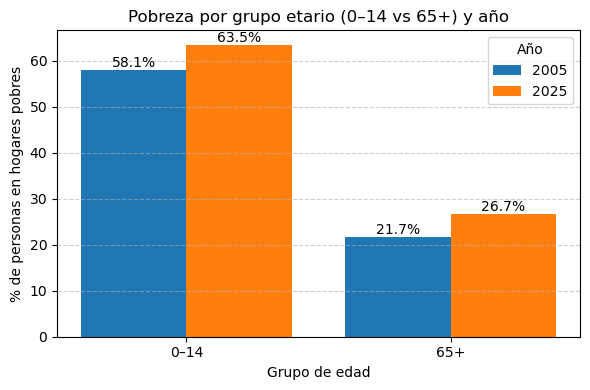

In [118]:
# --- copia y tipos mínimos ---
df = Sel_indiv.copy()
df["año"]   = pd.to_numeric(df["año"], errors="coerce")
df["CH06"]  = pd.to_numeric(df["CH06"], errors="coerce")   # edad
df["pobre"] = pd.to_numeric(df["pobre"], errors="coerce")  # 1/0/NaN

# me quedo solo con personas con dato de pobre y edad 
df_age = df.dropna(subset=["año","CH06","pobre"]).copy()

# dos grupos etarios: 0–14 y 65+ (descartamos el resto)
df_age["grupo"] = pd.Series(pd.NA, index=df_age.index, dtype="object")
df_age.loc[df_age["CH06"].between(0, 14, inclusive="both"), "grupo"] = "0–14"
df_age.loc[df_age["CH06"] >= 65, "grupo"] = "65+"
df_age = df_age.dropna(subset=["grupo"])

# tasa (% personas en hogares pobres) por grupo y año 
rates = (df_age.groupby(["grupo","año"])["pobre"].mean() * 100).unstack("año").sort_index()


# gráfico de barras agrupadas 
pos = np.arange(len(rates.index))           # 2 grupos: 0–14 y 65+
years = rates.columns.tolist()              # p.ej., [2005.0, 2025.0]
nY = len(years)
width = 0.8 / max(nY, 1)

plt.figure(figsize=(6,4))
for i, yr in enumerate(years):
    vals = rates[yr].values
    plt.bar(pos + i*width, vals, width=width, label=str(int(yr)))

plt.xticks(pos + width*(nY-1)/2, rates.index.astype(str))
plt.ylabel("% de personas en hogares pobres")
plt.xlabel("Grupo de edad")
plt.title("Pobreza por grupo etario (0–14 vs 65+) y año")
plt.legend(title="Año")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# anoto valores arriba de cada barra
for i, yr in enumerate(years):
    vals = rates[yr].values
    for j, y in enumerate(vals):
        plt.text(pos[j] + i*width, y, f"{y:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()
